## Bitcoin shows high volatility compared to the S&P 500, but how volatile is BTC compared to the S&P 500?

### Objective

The primary goal of this analysis is to evaluate the volatility of Bitcoin (BTC) in comparison to the S&P 500 index.

The analysis aims to assess volatility on a **monthly** and **annual** basis, highlighting significant differences and patterns over time. Key metrics such as **average volatility**, **peak volatility**, and their relative differences between BTC and the S&P 500 are calculated to provide a comprehensive understanding of market behavior and risk.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')

# Convert the date columns to datetime for proper handling
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Ensure the datsets are aligned by date
btc_data = btc_data.set_index('Date').sort_index()
sp500_data = sp500_data.set_index('Date').sort_index()

# Rename the 'Close' columns for clarity
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

In [28]:
# Assertion for make sure dates are aligned
assert btc_data.index.equals(sp500_data.index), "Datasets are not aligned"

In [29]:
# Resample data to monthly frequency and calculate standard deviation (volatility)
btc_monthly_volatility = btc_data['BTC_Price'].resample('ME').std()
sp500_monthly_volatility = sp500_data['SP500_Price'].resample('ME').std()

# Calculate annualized standard deviation (volatility)
btc_annual_volatility = btc_data['BTC_Price'].resample('YE').std()
sp500_annual_volatitliy = sp500_data['SP500_Price'].resample('YE').std()

In [30]:
# Combine results into a DataFrame for easy comparison
volatility_comparasion_monthly = pd.DataFrame({
  'BTC Monthly Volatility': btc_monthly_volatility,
  'S&P 500 Monthly Volatility': sp500_monthly_volatility
}).dropna()

volatility_comparasion_annual = pd.DataFrame({
  'BTC Annual Volatility': btc_annual_volatility,
  'S&P 500 Monthly Volatitliy': sp500_annual_volatitliy
}).dropna()
volatility_comparasion_monthly

,BTC Monthly Volatility,S&P 500 Monthly Volatility
Date,,
2014-09-30,19.333508,16.126224
2014-10-31,20.786979,43.663121
2014-11-30,26.645275,17.728770
2014-12-31,23.902759,33.394840
2015-01-31,36.022210,21.994332
...,...,...
2023-12-31,1290.027222,83.259249
2024-01-31,2274.734789,73.631047
2024-02-29,5767.272850,55.635652


Creating the graphs for the BTC and S&P 500 volatility

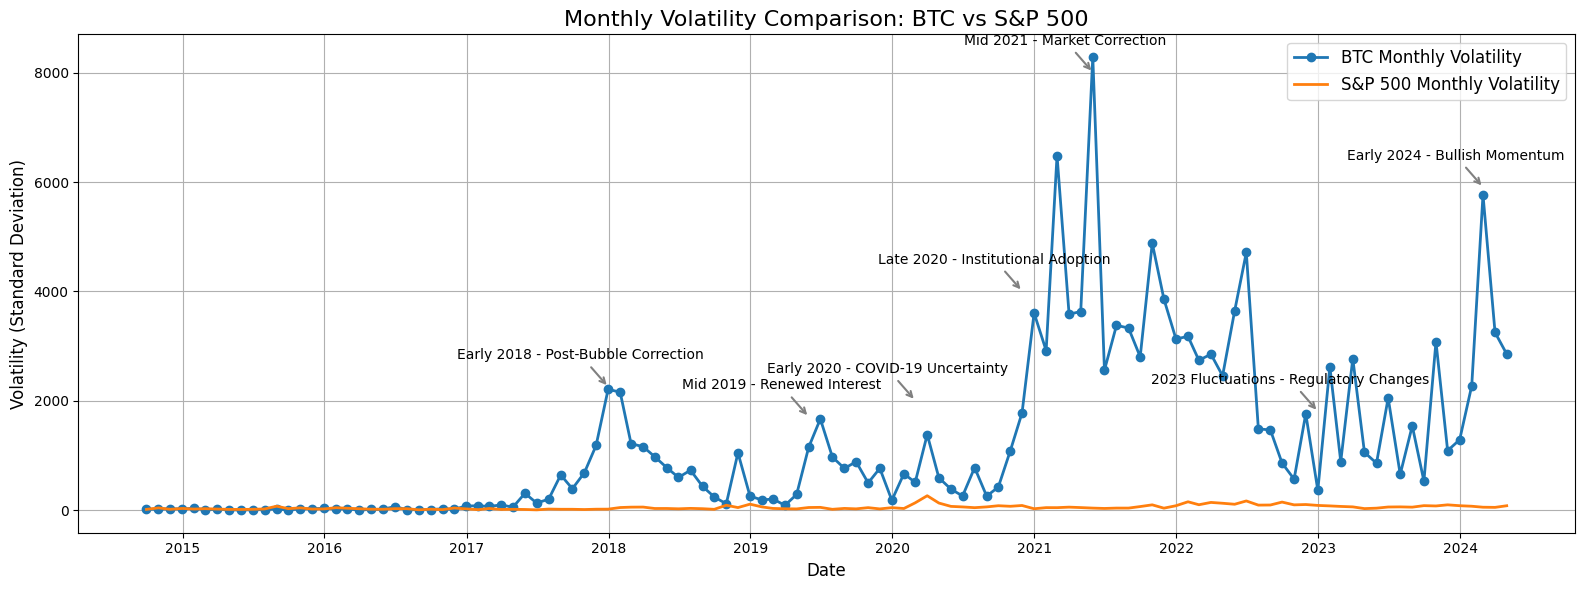

In [40]:
# Relevant events for the graph
events = {
    "Early 2018 - Post-Bubble Correction": ("2018-01", 2250),
    "Mid 2019 - Renewed Interest": ("2019-06", 1700),
    "Early 2020 - COVID-19 Uncertainty": ("2020-03", 2000),
    "Late 2020 - Institutional Adoption": ("2020-12", 4000),
    "Mid 2021 - Market Correction": ("2021-06", 8000),
    "2023 Fluctuations - Regulatory Changes": ("2023-01", 1800),
    "Early 2024 - Bullish Momentum": ("2024-03", 5900),
}

# Convert event dates to datetime
for label, (date, volatility) in events.items():
  events[label] = (pd.to_datetime(date), volatility)

# Plot Monthly Volatility
plt.figure(figsize=(16, 6))
plt.plot(
  volatility_comparasion_monthly.index, 
  volatility_comparasion_monthly['BTC Monthly Volatility'],
  label='BTC Monthly Volatility', 
  linewidth=2, linestyle='solid', 
  marker='o'
)
plt.plot(
  volatility_comparasion_monthly.index, 
  volatility_comparasion_monthly['S&P 500 Monthly Volatility'],
  label='S&P 500 Monthly Volatility', 
  linewidth=2, 
  linestyle='solid'
)

# Add annotations
for label, (date, volatility) in events.items():
  plt.annotate(
    label,
    (date, volatility),
    textcoords="offset points",
    xytext=(-20, 20), # Adjust position for better visibility
    ha="center",
    arrowprops=dict(arrowstyle="->", color='gray', lw=1.5), # Arrow to the point
    fontsize=10
  )

# Graph settings
plt.title('Monthly Volatility Comparison: BTC vs S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (Standard Deviation)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


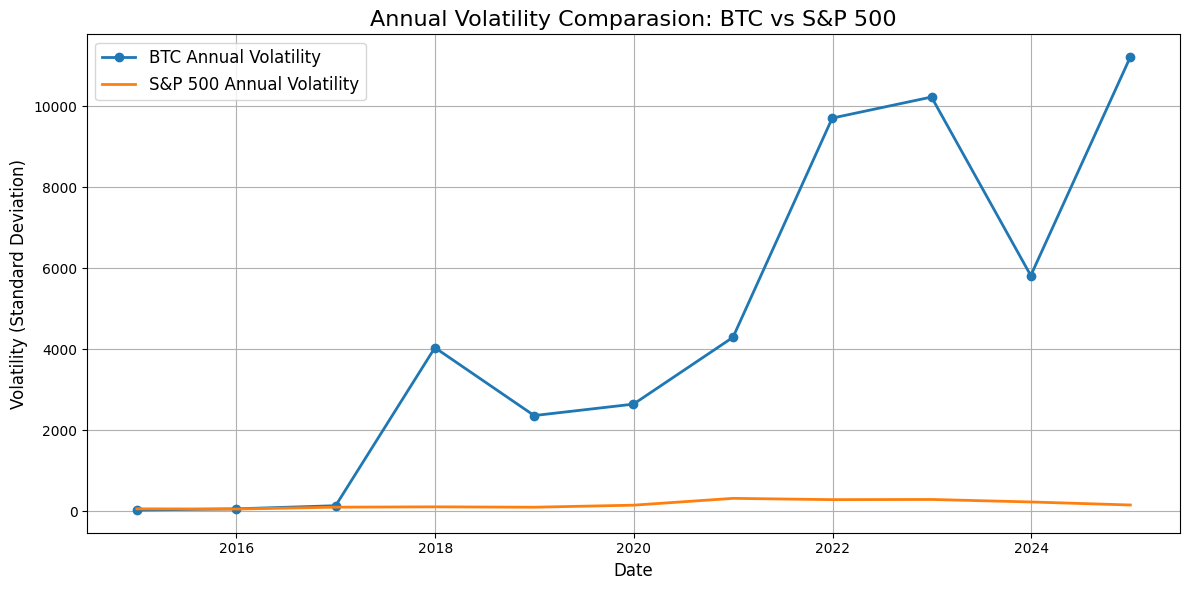

In [32]:
# Plot Annual Volatility
plt.figure(figsize=(12, 6))
plt.plot(
  volatility_comparasion_annual.index, 
  volatility_comparasion_annual['BTC Annual Volatility'],
  label='BTC Annual Volatility', 
  linewidth=2, linestyle='solid', 
  marker='o')
plt.plot(
  volatility_comparasion_annual.index, 
  volatility_comparasion_annual['S&P 500 Monthly Volatitliy'],
  label='S&P 500 Annual Volatility', 
  linewidth=2, 
  linestyle='solid'
)
plt.title('Annual Volatility Comparasion: BTC vs S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (Standard Deviation)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Compair Volatility Monthly

In [33]:
# Calculate daily returns
returns_btc = btc_data['BTC_Price'].pct_change() # pct_change() method for simple returns
returns_sp500 = sp500_data['SP500_Price'].pct_change()

# Grouping by month and calculate the monthly Standard deviation of the returns
monthly_volatility_btc = returns_btc.resample('ME').std() # Monthly Volatility of BTC
monthly_volatility_sp500 = returns_sp500.resample('ME').std() # Monthly Volatility of S&P 500

# calculate average and peak max of the monthly volatility
avg_monthly_volatility_btc = monthly_volatility_btc.mean()
max_monthly_volatility_btc = monthly_volatility_btc.max()

avg_monthly_volatility_sp500 = monthly_volatility_sp500.mean()
max_monthly_volatility_sp500 = monthly_volatility_sp500.max()

# Relation between the average monthly volatility
relative_monthly_volatility = avg_monthly_volatility_btc / avg_monthly_volatility_sp500

# Relation between the max monthly volatility
max_relative_monthly_volatility = max_monthly_volatility_btc / max_monthly_volatility_sp500

In [34]:
print(f"Bitcoin is {relative_monthly_volatility:.2f} times more volatile than the S&P 500 on average (monthly).")
print("This shows that Bitcoin has consistently higher volatility compared to the S&P 500.\n")

print(f"At its peak, Bitcoin was {max_relative_monthly_volatility:.2f} times more volatile than the S&P 500 (monthly).")
print("During extreme events, the volatility of the S&P 500 also increases, reducing the relative gap.")


Bitcoin is 4.26 times more volatile than the S&P 500 on average (monthly).
This shows that Bitcoin has consistently higher volatility compared to the S&P 500.

At its peak, Bitcoin was 1.74 times more volatile than the S&P 500 (monthly).
During extreme events, the volatility of the S&P 500 also increases, reducing the relative gap.


Compair Volatility Annually

In [35]:
# Calculate daily returns
returns_btc = btc_data['BTC_Price'].pct_change()  # Daily returns for BTC
returns_sp500 = sp500_data['SP500_Price'].pct_change()  # Daily returns for S&P 500

# Grouping by year and calculate the annual Standard Deviation of the returns
annual_volatility_btc = returns_btc.resample('YE').std()  # Annual volatility for BTC
annual_volatility_sp500 = returns_sp500.resample('YE').std()  # Annual volatility for S&P 500

# Calculate average and peak max of the annual volatility
avg_annual_volatility_btc = annual_volatility_btc.mean()
max_annual_volatility_btc = annual_volatility_btc.max()

avg_annual_volatility_sp500 = annual_volatility_sp500.mean()
max_annual_volatility_sp500 = annual_volatility_sp500.max()

# Relation between the average annual volatility
relative_annual_volatility = avg_annual_volatility_btc / avg_annual_volatility_sp500

# Relation between the max annual volatility
max_relative_annual_volatility = max_annual_volatility_btc / max_annual_volatility_sp500

In [36]:
print(f"Bitcoin is {relative_annual_volatility:.2f} times more volatile than the S&P 500 on average (annually).")
print(f"At its peak, Bitcoin was {max_relative_annual_volatility:.2f} times more volatile than the S&P 500 (annually).")

Bitcoin is 4.23 times more volatile than the S&P 500 on average (annually).
At its peak, Bitcoin was 2.68 times more volatile than the S&P 500 (annually).


In [37]:
# Comparison between Bitcoin's peak and the S&P 500's monthly average
btc_to_sp500_avg_volatility = max_monthly_volatility_btc / avg_monthly_volatility_sp500

print(f"During its peak, Bitcoin's volatility was {btc_to_sp500_avg_volatility:.2f} times higher than the S&P 500's average monthly volatility.")

During its peak, Bitcoin's volatility was 10.92 times higher than the S&P 500's average monthly volatility.


### Graphs for volatility visualization Monthly

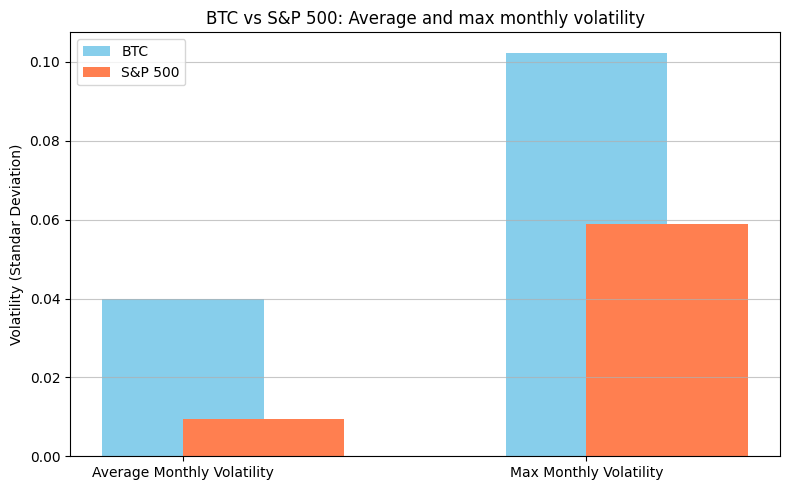

In [38]:
labels = ['Average Monthly Volatility', 'Max Monthly Volatility']
btc_values = [avg_monthly_volatility_btc, max_monthly_volatility_btc]
sp500_values = [avg_monthly_volatility_sp500, max_monthly_volatility_sp500]

x = range(len(labels))

# Plotting the graph
plt.figure(figsize=(8, 5))
plt.bar(x, btc_values, width=0.4, label='BTC', align='center', color='skyblue')
plt.bar(x, sp500_values, width=0.4, label='S&P 500', align='edge', color='coral')
plt.xticks(x, labels)
plt.ylabel('Volatility (Standar Deviation)')
plt.title('BTC vs S&P 500: Average and max monthly volatility')
plt.legend()
plt.grid(axis='y', linestyle='solid', alpha=0.7)
plt.tight_layout()
plt.show()

### Graphs for volatility visualization Yearly

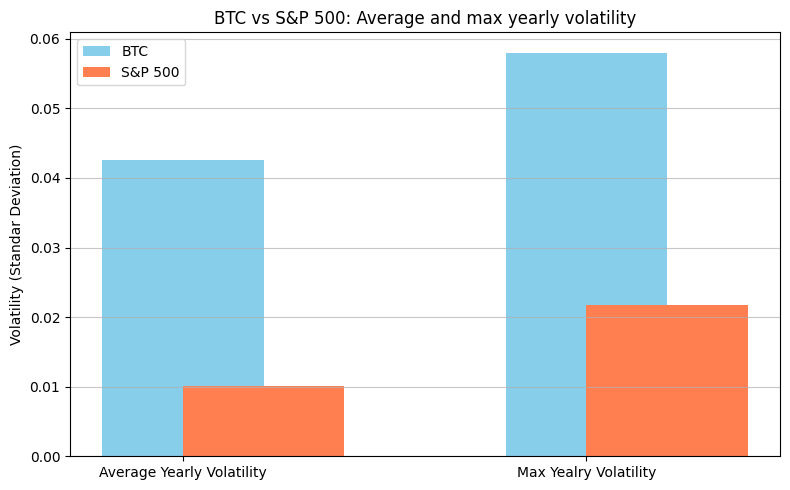

In [39]:
labels = ['Average Yearly Volatility', 'Max Yealry Volatility']
btc_values = [avg_annual_volatility_btc, max_annual_volatility_btc]
sp500_values = [avg_annual_volatility_sp500, max_annual_volatility_sp500]

x = range(len(labels))

# Plotting the graph
plt.figure(figsize=(8, 5))
plt.bar(x, btc_values, width=0.4, label='BTC', align='center', color='skyblue')
plt.bar(x, sp500_values, width=0.4, label='S&P 500', align='edge', color='coral')
plt.xticks(x, labels)
plt.ylabel('Volatility (Standar Deviation)')
plt.title('BTC vs S&P 500: Average and max yearly volatility')
plt.legend()
plt.grid(axis='y', linestyle='solid', alpha=0.7)
plt.tight_layout()
plt.show()

## Observations and Conclusions
### Key Observations:
1. **Higher Volatility in Bitcoin**:
   - Bitcoin's average monthly volatility is approximately **4.26 times** higher than that of the S&P 500.
   - During its peak, Bitcoin was **10.92 times** more volatile than the S&P 500's average monthly volatility.
   - Bitcoin is **4.23 times** more volatile than the S&P 500 on average (annually).
   - At its peak, Bitcoin was **2.68 times** more volatile than the S&P 500 (annually).

2. **Relative Volatility During Extreme Events**:
   - At its peak, Bitcoin was **1.74 times** more volatile than the S&P 500's peak monthly volatility, indicating that even during extreme market conditions, Bitcoin exhibits greater risk.

3. **Consistent Volatility Patterns**:
   - Bitcoin consistently shows significantly higher volatility across both monthly and annual analyses compared to the S&P 500.

4. **Key Events Influencing Volatility**:
   - Notable market events, such as **the COVID-19 crash (2020)** and **institutional adoption (late 2020)**, drove sharp increases in Bitcoin's volatility.
   - Regulatory changes and market corrections during **2023** further contributed to Bitcoin's fluctuations, albeit at a reduced scale compared to earlier years.

### Conclusions:
1. **Bitcoin as a High-Risk Asset**:
   - Bitcoin's volatility significantly surpasses that of the S&P 500, confirming its status as a high-risk asset. Investors must consider this heightened risk when including Bitcoin in portfolios.

2. **Market Sensitivity to External Events**:
   - Both Bitcoin and the S&P 500 exhibit sensitivity to macroeconomic and regulatory events, but Bitcoin's responses are more pronounced, highlighting its speculative nature.

3. **Potential for Diversification**:
   - Despite its volatility, Bitcoin could provide diversification benefits in portfolios, especially for high-risk, high-reward strategies.

4. **Future Implications**:
   - As institutional adoption and regulation evolve, Bitcoin's volatility might stabilize over time, though it will likely remain higher than traditional indices like the S&P 500.
